# FEATURE ENGINEERING
* From the exploratory data analysis we have been able to gain a great number of insight into our data and also build up an idea of our the data might be augumented in order to product a better model
> In liu of this we are going to be taking the following steps to get our data to the desired output
>> 1. Since our data is heavily imbalance and might be more favourable into predicting the not buying class, also is the fact that products_purchased is one of the most contributiing element to determine whether a customer will buy the product or not hence, one appoarch to tackle this imbalance is to drop all the rows where the products purchased is not a number and buy is 0 (not buy)
>> 2. Since individually each user columns has little contribution to the whether a customer will buy the product or not hence it will be good to sum up all the columns for user activity
>> 3. Also on the own the created_at and signup_date are not useful, in order for us to extract meaning from them we will substract one from another
> On the final note we will perform more exploratory data analysis to further understand the new state of our data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use("seaborn-dark")

In [2]:
train_pth = "train_wn75k28.csv" # Path to the training data

In [3]:
df = pd.read_csv(train_pth, index_col='id') # loading the data into jupyter lab

## Task 1
* The first feature we will engineer is the products_purchased columns which 53.4% of the value is nan
* We are going to investigate the number of missing values in the products_purchased column along the product bought and the product not bought. We are going to drop the 19866 rows thereby reducing the imbalance in the data

In [4]:
print("Total missing values in products_purchased columns: ", df["products_purchased"].isna().sum(), end="\n\n")

print("Total missing values in the products_purchased for products not bought: ", 
      df[df["buy"] == 0]["products_purchased"].isna().sum(), end="\n\n")

print("Total missing values in the products_purchased for products purchased: ",
      df[df["buy"] == 1]["products_purchased"].isna().sum())

Total missing values in products_purchased columns:  20911

Total missing values in the products_purchased for products not bought:  19866

Total missing values in the products_purchased for products purchased:  1045


In [5]:
product_not_bought = df[df["buy"] == 0]  # Extracting the data where the product was not bought 
                                         # and storing it in variable product_not_bought
    
# The line below further limits the product_not_bought to rows where the products_purchased is nan
product_not_bought_purchased_isna = product_not_bought[product_not_bought["products_purchased"].isna()]

# The index_purchased_isna is used to store index of the variable above
index_purchased_isna = product_not_bought_purchased_isna.index

print("Distinct values in products_purchased of the product_not_bought_purchased_isna table: ", product_not_bought_purchased_isna["products_purchased"].unique(), end="\n\n")
print("First ten index of rows that will be removed: ", index_purchased_isna[:10], end="\n\n")

# Dropping the index
df.drop(index = index_purchased_isna, inplace=True)

# Checking to see if the missing value in products_purchased is limited to 1045
print("Missing values in the products_purchased columns: ", df["products_purchased"].isna().sum())

Distinct values in products_purchased of the product_not_bought_purchased_isna table:  [nan]

First ten index of rows that will be removed:  Int64Index([5, 8, 12, 15, 16, 18, 20, 21, 22, 23], dtype='int64', name='id')

Missing values in the products_purchased columns:  1045


## Task 2
* We will also been engineering the signup_date columns, this is to ensure we drop as many nan as possible without any fundamental effect on the product purchased which is less compared to product not purchased
* As par the first engineering dropping some of the nan has also led to reduction in the number of nan we have sign_date columns below are number attestion to the number of the missing we have
* Hence the goal is to remove the 3844 missing values

In [6]:
print("Total missing values in the signup_date column: ", df["signup_date"].isna().sum(), end="\n\n")

print("Total missing values in the signup_date column for products not bought: ", 
      df[df["buy"] == 0]["signup_date"].isna().sum(), end="\n\n")

print("Total missing values in the signup_date column for products bought: ", 
      df[df["buy"] == 1]["signup_date"].isna().sum())

Total missing values in the signup_date column:  3869

Total missing values in the signup_date column for products not bought:  3844

Total missing values in the signup_date column for products bought:  25


In [7]:
product_not_bought = df[df["buy"] == 0] # Extracting the data where the product was not bought 
                                        # and storing it in variable product_not_bought

# The line below further limits the product_not_bought to rows where the signup_date is nan
product_not_bought_signup_date= product_not_bought[product_not_bought["signup_date"].isna()]

# The index_signup_date_isna is used to store index of the variable above
index_signup_date_isna = product_not_bought_signup_date.index

print("Distinct values in signup_date of the product_not_bought_signup_date table: ", product_not_bought_signup_date["signup_date"].unique(), end="\n\n")
print("First ten index of rows that will be removed: ", index_signup_date_isna[:10], end="\n\n")

# Dropping the index
df.drop(index = index_signup_date_isna, inplace=True)

print("Missing values in the signup_date columns: ", df["signup_date"].isna().sum())

Distinct values in signup_date of the product_not_bought_signup_date table:  [nan]

First ten index of rows that will be removed:  Int64Index([45, 62, 84, 94, 115, 116, 167, 177, 184, 254], dtype='int64', name='id')

Missing values in the signup_date columns:  25


In [8]:
df.isna().sum() # Missing value across the columns

created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      1045
signup_date               25
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
buy                        0
dtype: int64

## Task 3
* As noted in the introduction above, the user activities on it own doesn't contribution much to the model prediction hence the need to sumup the columns for the user activities

In [9]:
user_activity_col = [x for x in df.columns if x.startswith("user")] # Extracting the column name indicating user activties
print("Column name for user activities: ",user_activity_col)

df["sum_user_activities"] = np.sum([df[x] for x in user_activity_col], 0) # Summing the user activities columns
df.drop(columns=user_activity_col, inplace=True) # Dropping the none informative user activities columns

Column name for user activities:  ['user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12']


## Task 4
* In this activity we will see how we can adapt our dates ```created_at and signup_date``` into a structure that is acceptable to our model hence the plan is use the idea of how long each customer has been patrolinizing the company and to achieve this I subtract the created_at column from the signup_date
* As a first step from the EDA we notice that the data format of both columns are not correct hence we will first convert them to the correct data type which is datetime
* Drilling down further you will observe that some of the days contains negative number is indicates that there could have been problem with the data entry in such case to avoid this negative effect has it is not possible for day to be negative hence to need to take the absolute value
* Also, is the need to convert the day from timedelta64[ns] in a numercial data type

In [10]:
# Converting the created_at and signup_date columns into datetime data type
df["created_at"] = pd.to_datetime(df["created_at"], format="%Y-%m-%d") 
df["signup_date"] = pd.to_datetime(df["signup_date"], format="%Y-%m-%d")

# Calculating the number of day each customer has been interactive with the company
day = df["created_at"] - df["signup_date"]

print("days of customer activeness")
print(day.head(), end="\n\n") # Perview the day data

day = day.replace({np.nan:day.max()}) # Replacing the missing value with the most largest value

#day = day.astype('str').str.split(" ", expand=True)[0] 

day = day.astype("str").str.extract(r"(-?[0-9]*)").rename(columns={0:"day"}) # The value is coverted into str type
print("Extracted days")
print(day.head(), end="\n\n") # Perview the day data

# Changing the lenght of the negative value in the data
print("length of negative values in the day", len(day["day"].astype('int')[day["day"].astype('int') < 0]))

df["day"] = np.abs(day.astype('int')) # Converting the data to an int data type

df.drop(columns=["created_at", "signup_date"], inplace=True) # Dropping the date columns

days of customer activeness
id
1     99 days
2    104 days
3   -222 days
4   1185 days
6    549 days
dtype: timedelta64[ns]

Extracted days
     day
id      
1     99
2    104
3   -222
4   1185
6    549

length of negative values in the day 3279


## Task 5
* To avoid collinearity, there is a high correlation between the campaign var the sum of the campaign var is taken

In [11]:
camp_col = [x for x in df.columns if x.startswith("camp")] # Extracting the column names that has campaign var

df["sum_camp"] = np.sum([df[x] for x in camp_col], 0) # Summing the columns extracted
#df.drop(columns=camp_col, inplace=True)

## Task 6
* With this we have all the major feature engineering. Left for us is to do some more EDA if there is anything we didn't caught in our previous process
* We also be filling all the nan in the products_purchased columns with 0

In [12]:
df["products_purchased"] = df["products_purchased"].fillna(0) # Filling missing values with 0

In [13]:
df.head() # Preview of the new engineered data

,campaign_var_1,campaign_var_2,products_purchased,buy,sum_user_activities,day,sum_camp
id,,,,,,,
1,1,2,2.0,0,2,99,3
2,2,1,2.0,0,3,104,3
3,9,3,3.0,0,1,222,12
4,6,7,2.0,0,0,1185,13
6,3,4,3.0,0,1,549,7


In [14]:
df.shape # Shape of the new data 

(15451, 7)

In [15]:
df.isna().sum() # Checking the number of missing value

campaign_var_1         0
campaign_var_2         0
products_purchased     0
buy                    0
sum_user_activities    0
day                    0
sum_camp               0
dtype: int64

## Task 7
* There exist a collinearity between campaign_var_1 and campaign_var_2 with sum_camp hence we will drop the campaign_var_1 and campaign_var_2
* We ended up with 15451 rows and 5 columns

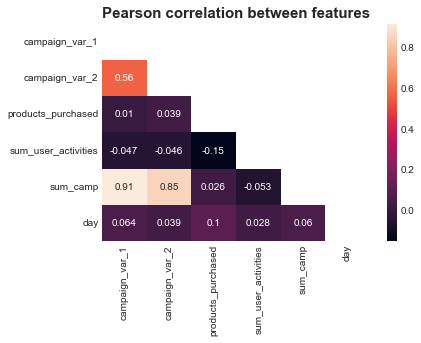

In [16]:
# Checking is there still exist an other collinearity
corr = df[["campaign_var_1", "campaign_var_2", "products_purchased", "sum_user_activities", "sum_camp", "day"]].corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(data=corr, mask=mask, annot=True)
    plt.title("Pearson correlation between features", size=15, weight="bold")

In [17]:
df.drop(columns=["campaign_var_1", "campaign_var_2"], inplace=True)

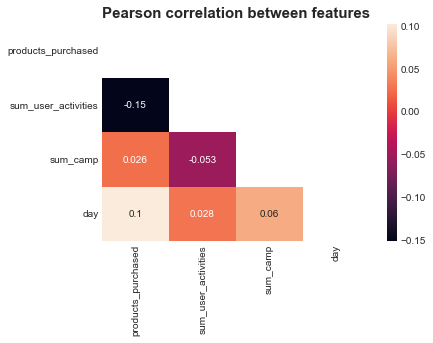

In [18]:
corr = df[["products_purchased", "sum_user_activities", "sum_camp", "day"]].corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(data=corr, mask=mask, annot=True)
    plt.title("Pearson correlation between features", size=15, weight="bold")

In [19]:
df.shape

(15451, 5)

## Task 8
* Checking the distribution of the all the variables with it effect on buy columns

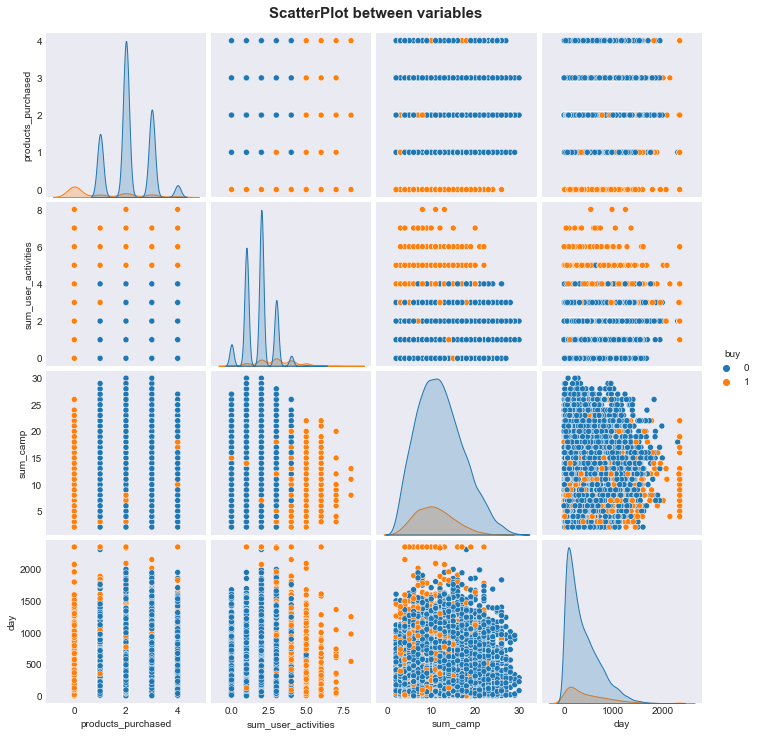

In [20]:
# Plotting a scatterplot combination of the all the columns
g = sns.pairplot(data=df, hue="buy", vars=["products_purchased", "sum_user_activities", "sum_camp", "day"])
g.fig.suptitle("ScatterPlot between variables", size=15, weight="bold", y=1.02);

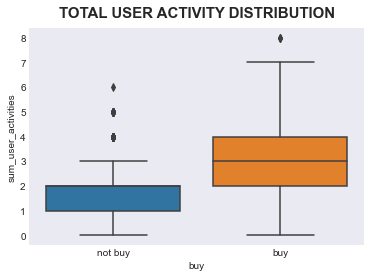

In [21]:
sns.boxplot(x="buy", y="sum_user_activities", data=df) # Boxplot for sum of user activities
plt.title("TOTAL USER ACTIVITY DISTRIBUTION", size=15, weight="bold", y=1.02)
plt.xticks([1, 0], ["buy", "not buy"]);

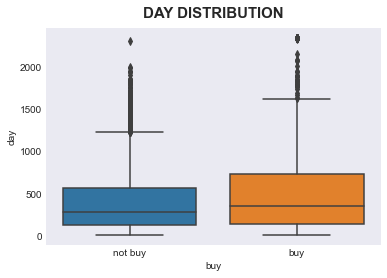

In [22]:
sns.boxplot(x="buy", y="day", data=df) # Boxplot for day column
plt.title("DAY DISTRIBUTION", size=15, weight="bold", y=1.02)
plt.xticks([1, 0], ["buy", "not buy"]);

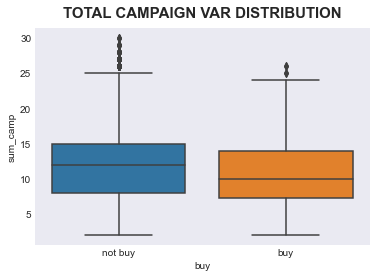

In [23]:
sns.boxplot(x="buy", y="sum_camp", data=df) # Boxplot for total campaign column
plt.title("TOTAL CAMPAIGN VAR DISTRIBUTION", size=15, weight="bold", y=1.02)
plt.xticks([1, 0], ["buy", "not buy"]);

0    13453
1     1998
Name: buy, dtype: int64



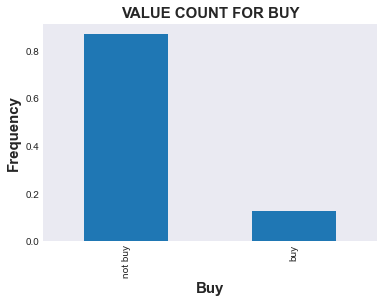

In [24]:
print(df["buy"].value_counts(), end="\n\n")

font = {"weight": "bold", "size":15}
with mpl.rc_context({'axes.labelsize': 15, 'axes.labelweight': 'bold', 'axes.titlesize':15, 'axes.titleweight': 'bold'}):
    (df["buy"]
     .value_counts(normalize=True)
     .plot
     .bar(title="Value count for buy".upper(), xlabel="Buy", ylabel="Frequency")
    )
    plt.xticks([1, 0], ["buy", "not buy"]);

In [25]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
products_purchased,15451.0,2.006666,0.928872,0.0,1.0,2.0,3.0,4.0
buy,15451.0,0.129312,0.335556,0.0,0.0,0.0,0.0,1.0
sum_user_activities,15451.0,1.959679,1.048836,0.0,1.0,2.0,3.0,8.0
day,15451.0,395.534075,351.589466,0.0,123.0,292.0,582.0,2350.0
sum_camp,15451.0,11.868099,5.133740,2.0,8.0,11.0,15.0,30.0


## Task 9
* Finally we will put together all process of feature engineering that has been perform above

In [27]:
def wraggling(path):
    df = pd.read_csv(path, index_col='id')
    
    # Removing missing values for products_purchased and signup_date for products not purchased
    product_not_bought = df[df["buy"] == 0]
    product_not_bought_purchased_isna = product_not_bought[product_not_bought["products_purchased"].isna()]
    index_purchased_isna = product_not_bought_purchased_isna.index
    df.drop(index = index_purchased_isna, inplace=True)
    
    product_not_bought = df[df["buy"] == 0]
    product_not_bought_signup_date= product_not_bought[product_not_bought["signup_date"].isna()]
    index_signup_date_isna = product_not_bought_signup_date.index
    df.drop(index = index_signup_date_isna, inplace=True)
    
    # Summing all the user activity
    user_activity_col = [x for x in df.columns if x.startswith("user")]
    df["sum_user_activities"] = np.sum([df[x] for x in user_activity_col], 0)
    
    # Making the date columns usable for our model
    df["created_at"] = pd.to_datetime(df["created_at"], format="%Y-%m-%d")
    df["signup_date"] = pd.to_datetime(df["signup_date"], format="%Y-%m-%d")
    day = df["created_at"] - df["signup_date"]
    day = day.replace({np.nan:day.max()})
    day = day.astype('str').str.split(" ", expand=True)[0]
    day["day"] = np.abs(day.astype('int'))
    
    # Summing the campaign vars in the data
    camp_col = [x for x in df.columns if x.startswith("camp")]
    df["sum_camp"] = np.sum([df[x] for x in camp_col], 0)
    
    # imputting missing value
    df["products_purchased"] = df["products_purchased"].fillna(0)
    
    # Removing unwanted columns
    df.drop(columns = camp_col + ["created_at", "signup_date"] + user_activity_col, inplace=True)
    return df